In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#import tensorflow as tf
#import pickle

In [2]:
order_df = pd.read_csv(r"C:\Users\engga\OneDrive\Documents\Porkodi_guvi\Guvi_project\Streamlit\Final Project\orders.csv")

In [3]:
order_pro_train_df = pd.read_csv(r"C:\Users\engga\OneDrive\Documents\Porkodi_guvi\Guvi_project\Streamlit\Final Project\order_products__train.csv")

In [4]:
order_pro_prior_df = pd.read_csv(r"C:\Users\engga\OneDrive\Documents\Porkodi_guvi\Guvi_project\Streamlit\Final Project\order_products__prior.csv")

In [5]:
# Combine train and prior datasets
order_products_df = pd.concat([order_pro_train_df, order_pro_prior_df])

In [6]:
# Merge with orders
dff = pd.merge(order_df, order_products_df, on="order_id")

In [7]:
dff.shape

(2433192, 10)

In [8]:
product_df = pd.read_csv(r"C:\Users\engga\OneDrive\Documents\Porkodi_guvi\Guvi_project\Streamlit\Final Project\products.csv")

In [9]:
dept_df = pd.read_csv(r"C:\Users\engga\OneDrive\Documents\Porkodi_guvi\Guvi_project\Streamlit\Final Project\departments.csv")

In [10]:
dff1 = pd.merge(product_df,dept_df, on = "department_id")

In [11]:
df = pd.merge(dff,dff1, on = "product_id")

In [12]:
df.shape

(2433192, 14)

In [13]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i, df[i].isnull().sum())

days_since_prior_order 67030


In [14]:
df["days_since_prior_order"] = df["days_since_prior_order"].fillna(0)

In [17]:
df.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
#skewness,#kurotis
for i in df.columns:
    if df[i].dtype in ['int','float64']:
        print(i, "Skew :",df[i].skew(), "Kurtosis :", df[i].kurtosis())

order_id Skew : 0.7656156412946572 Kurtosis : -0.8945386780550075
user_id Skew : 0.0007666147927593033 Kurtosis : -1.200651969245386
order_number Skew : 2.0087511883709297 Kurtosis : 4.573195419224027
order_dow Skew : 0.1769478347475845 Kurtosis : -1.370693223578216
order_hour_of_day Skew : -0.08725819252111469 Kurtosis : 0.01518501462265709
days_since_prior_order Skew : 0.4610282487062522 Kurtosis : -1.2756256876565006
product_id Skew : -0.021779681058833246 Kurtosis : -1.148576192898553
add_to_cart_order Skew : 1.7874641125724744 Kurtosis : 5.455859215186503
reordered Skew : -0.38742554105627497 Kurtosis : -1.8499029706944412
aisle_id Skew : -0.16934182310662552 Kurtosis : -1.3191707867915425
department_id Skew : 0.16645083321789772 Kurtosis : -1.5479383501571082


In [17]:
#dropping the unneccassary column
df = df.drop(['order_id','eval_set'],axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433192 entries, 0 to 2433191
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   order_number            int64  
 2   order_dow               int64  
 3   order_hour_of_day       int64  
 4   days_since_prior_order  float64
 5   product_id              int64  
 6   add_to_cart_order       int64  
 7   reordered               int64  
 8   product_name            object 
 9   aisle_id                int64  
 10  department_id           int64  
 11  department              object 
dtypes: float64(1), int64(9), object(2)
memory usage: 222.8+ MB


In [19]:
for i in df.columns:
    if df[i].dtypes == object:
        print(i, df[i].unique())

product_name ['Soda' 'Organic String Cheese' '0% Greek Strained Yogurt' ...
 'Organic Aromatherapeutic Moroccan Argan Oil Set'
 'Vitamin Code Raw One For Women Vegetarian Capsules'
 'Blasted Chocolatey Chip Marshmallow Rice Krispies Treats']
department ['beverages' 'dairy eggs' 'household' 'snacks' 'breakfast' 'deli' 'frozen'
 'produce' 'personal care' 'canned goods' 'alcohol' 'pantry'
 'international' 'meat seafood' 'bakery' 'dry goods pasta' 'other'
 'babies' 'pets' 'bulk' 'missing']


In [ ]:
#encoding with mapped values

label_encoders = {}

for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nCategory Mappings after Encoding:\n")
for col, le in label_encoders.items():
    print(f"Column: {col}")
    for class_index, class_label in enumerate(le.classes_):
        print(f"  {class_label} --> {class_index}")
    print()


In [ ]:
#unique value with mapped value:

for col, le in label_encoders.items():
    print(f"Column: {col}")
    # Original unique values (sorted by label encoder order)
    original_values = le.classes_
    # Encoded values are just indexes from 0 to len(classes_) - 1
    for class_index, class_label in enumerate(original_values):
        print(f" {class_label}  -->  Encoded Value: {class_index}")
    print()


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433192 entries, 0 to 2433191
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   order_number            int64  
 2   order_dow               int64  
 3   order_hour_of_day       int64  
 4   days_since_prior_order  float64
 5   product_id              int64  
 6   add_to_cart_order       int64  
 7   reordered               int64  
 8   product_name            int64  
 9   aisle_id                int64  
 10  department_id           int64  
 11  department              int64  
dtypes: float64(1), int64(11)
memory usage: 222.8 MB


In [23]:
# Features for StandardScaler and min max scaler
std_cols = ['user_id', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'aisle_id', 'department_id']
minmax_cols = ['order_number', 'add_to_cart_order']

std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
df[std_cols] = std_scaler.fit_transform(df[std_cols])
df[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])


In [24]:
df.head(5)

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,-1.731807,0.10101,0.600291,-1.296464,-0.015638,-1.797814,0.000000,1,35650,0.150280,-0.457489,3
1,-1.731807,0.10101,0.600291,-1.296464,-0.015638,-0.030760,0.007937,1,27552,-1.317855,0.973587,7
2,-1.731807,0.10101,0.600291,-1.296464,-0.015638,0.946764,0.015873,1,19,1.277598,0.973587,7
3,-1.731807,0.10101,0.600291,-1.296464,-0.015638,0.059375,0.023810,1,42385,-0.452704,1.132595,11
4,-1.731807,0.10101,0.600291,-1.296464,-0.015638,0.998421,0.031746,1,21792,-0.688655,1.450612,20


In [31]:
df.to_csv("data.csv", index=False)

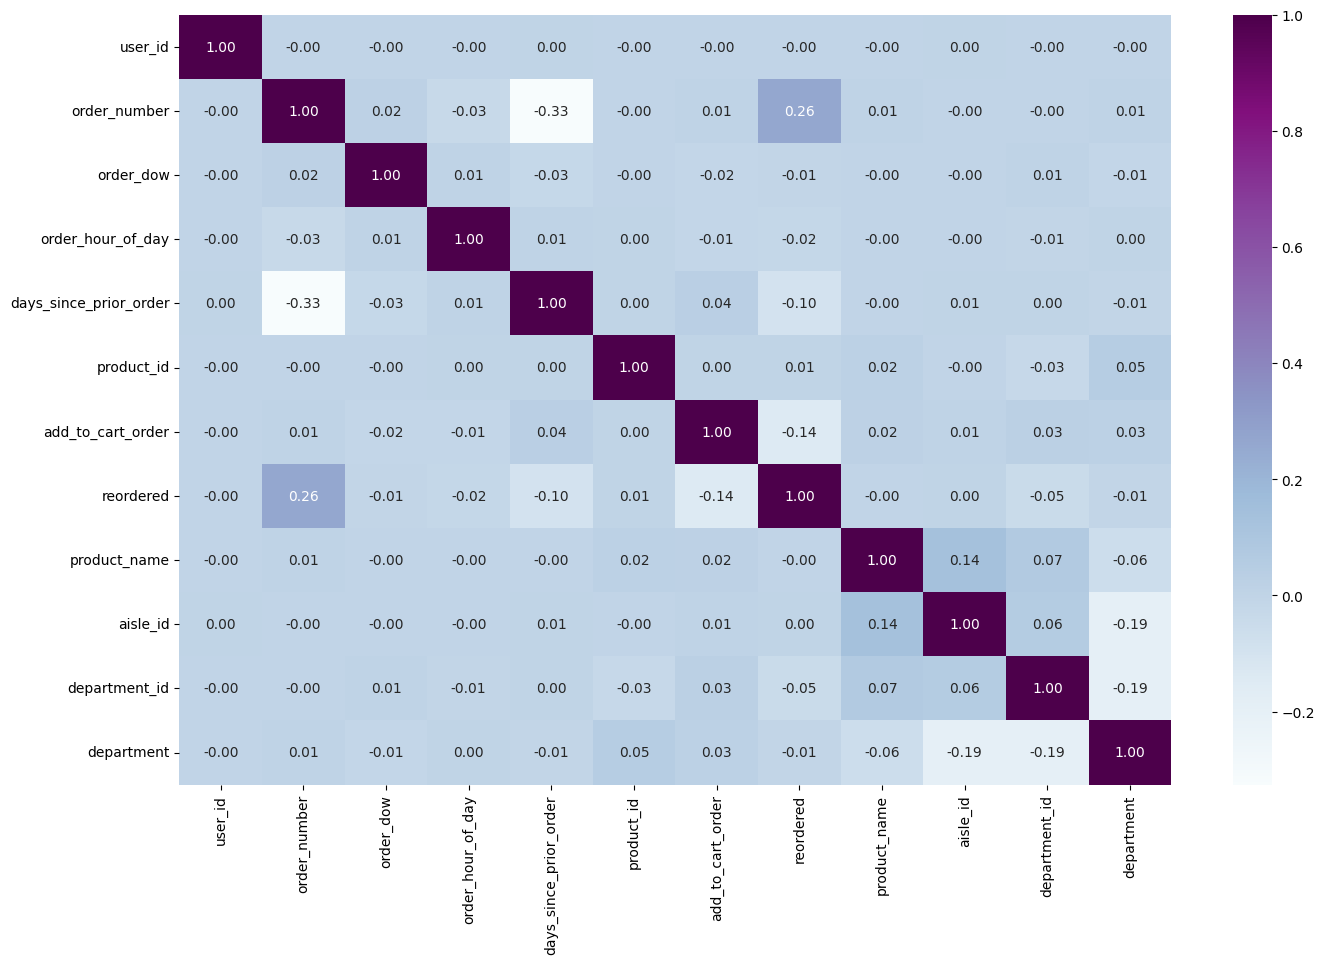

In [25]:
#correlation:
features = ['user_id','order_number','order_dow','order_hour_of_day','days_since_prior_order','product_id','add_to_cart_order','reordered',
'product_name','aisle_id','department_id', 'department']
corr_1= df[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_1, annot=True, fmt = ".2f", cmap = "BuPu");

In [26]:
x = df.drop(["reordered"], axis=1)

In [27]:
y = df["reordered"]

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433192 entries, 0 to 2433191
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 float64
 1   order_number            float64
 2   order_dow               float64
 3   order_hour_of_day       float64
 4   days_since_prior_order  float64
 5   product_id              float64
 6   add_to_cart_order       float64
 7   product_name            int64  
 8   aisle_id                float64
 9   department_id           float64
 10  department              int64  
dtypes: float64(9), int64(2)
memory usage: 204.2 MB


In [29]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2433192 entries, 0 to 2433191
Series name: reordered
Non-Null Count    Dtype
--------------    -----
2433192 non-null  int64
dtypes: int64(1)
memory usage: 18.6 MB


In [30]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from tensorflow.keras.utils import to_categorical
y_new = to_categorical(y)

In [32]:
y_new

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_new_train,y_new_test = train_test_split(x,y_new, test_size = 0.2)

In [34]:
x_train.shape

(1946553, 11)

In [38]:
import tensorflow as tf
dir(tf.keras.metrics)

['AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'BinaryIoU',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'ConcordanceCorrelation',
 'CosineSimilarity',
 'F1Score',
 'FBetaScore',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'IoU',
 'KLD',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanMetricWrapper',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Metric',
 'OneHotIoU',
 'OneHotMeanIoU',
 'PearsonCorrelation',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'R2Score',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loa

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Model definition
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))

model.add(Dense(512))
model.add(ReLU())
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256))
model.add(ReLU())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(ReLU())
model.add(BatchNormalization())

model.add(Dense(64))
model.add(ReLU())

model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.CategoricalAccuracy(name='accuracy')
        
         ]
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

# Train the model
result = model.fit(
    x_train, y_new_train,
    validation_split=0.2,
    epochs=40,
    batch_size=1024,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/40
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.5841 - auc: 0.5971 - loss: 0.6863 - precision: 0.5841 - recall: 0.5841 - val_accuracy: 0.5946 - val_auc: 0.5966 - val_loss: 0.6768 - val_precision: 0.5946 - val_recall: 0.5946 - learning_rate: 0.0010
Epoch 2/40
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.5947 - auc: 0.6074 - loss: 0.6747 - precision: 0.5947 - recall: 0.5947 - val_accuracy: 0.5946 - val_auc: 0.6105 - val_loss: 0.6739 - val_precision: 0.5946 - val_recall: 0.5946 - learning_rate: 0.0010
Epoch 3/40
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5945 - auc: 0.6087 - loss: 0.6742 - precision: 0.5945 - recall: 0.5945 - val_accuracy: 0.5946 - val_auc: 0.6096 - val_loss: 0.6740 - val_precision: 0.5946 - val_recall: 0.5946 - learning_rate: 0.0010
Epoch 4/40
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5950 - auc: 0.6104 - loss: 0.6735 - precision: 0.5950 - recall: 0.5950 - val_accuracy: 0.5946 - val_auc: 0.6076 - val_lo

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)      
y_true = np.argmax(y_new_test, axis=1)  
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)
cr = classification_report(y_true, y_pred, target_names=['Not Reordered', 'Reordered'])
print("\nClassification Report:\n", cr)


15208/15208 ━━━━━━━━━━━━━━━━━━━━ 12s 755us/step
Confusion Matrix:
 [[ 60665 135889]
 [ 26891 263194]]

Classification Report:
                precision    recall  f1-score   support

Not Reordered       0.69      0.31      0.43    196554
    Reordered       0.66      0.91      0.76    290085

     accuracy                           0.67    486639
    macro avg       0.68      0.61      0.60    486639
 weighted avg       0.67      0.67      0.63    486639



In [44]:
import pickle
pickle.dump(model, open("Final.pkl","wb"))